### Tarea Práctica - INFO257 Unidad 1
#### Fabián Catalán Vejar


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as skldatasets

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

df = pd.read_csv("SDSS-DR14.csv")
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


Cambiamos de posición la columna **class** al final para un mejor manejo y convertimos sus datos a variables dummy

In [2]:
# df.isnull().sum() # no hay nulos
# df.info() # 10000 valores no nulos.
cl = df['class']
clase = pd.get_dummies(cl)
df = df.drop( ['class'] ,1)
#df = pd.concat([df,clase],axis=1)
#df.head()

Se hará una estrategia: Si class es **GALAXY = 1**, **QSO = 2**, **STAR = 3**

In [3]:
cl = cl.apply(lambda x: {
        'GALAXY': 1,
        'QSO': 2,
        'STAR': 3
    }[x])
cl.head()

0    3
1    3
2    1
3    3
4    3
Name: class, dtype: int64

Se procede a ver que tan balanceado está el dataset.

In [4]:
from collections import Counter
Counter(cl)

Counter({3: 4152, 1: 4998, 2: 850})

Podemos notar que la distribución de los datos está notablemente desbalanceada. Los Quasar (QSO) solamente tienen el 8.5% de los resultados. Entonces prepararemos el dataset para el posterior balanceo por oversampling

In [5]:
#Concatenamos al dataframe 
df = pd.concat([df, cl],1)
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,3
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,3
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,3
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,3
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,0.000315,324,51666,594,3
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,0.100242,287,52023,559,1
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,0.000315,3306,54922,515,3
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,0.000089,323,51615,595,3
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,0.040508,288,52000,400,1


### Limpieza de datos y balanceo

Se limpiará los datos, para ello buscaremos columnas con datos constantes. Posteriormente se eliminarán las columnas con datos no únicos

In [6]:
df.columns[df.nunique() <= 1]

Index(['objid', 'rerun'], dtype='object')

In [7]:
df = df.drop(['objid', 'rerun'],1)
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491,3
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541,3
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510,3
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512,3


Ahora usaremos la libreria imbalanced learn para ver el balanceo de los datos

> https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [8]:
import imblearn.over_sampling as imb

In [9]:
oversample = imb.RandomOverSampler(sampling_strategy='minority')

In [10]:
#Definir dataset
X = df.iloc[:,0:15].values
y = df.iloc[:,15].values


Se empleará en primera instancia una relación entre variables, Notamos que podría existir desbalance en los datos. 

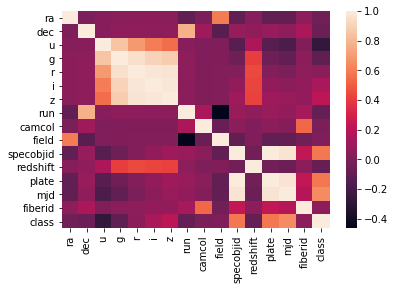

In [11]:
sb.heatmap(df.corr())

Notamos que existen variables con correlación negativa(**run, field**), por lo tanto eliminaremos: **run** . Se ploteará una segunda vez

In [12]:
df_corr = df
df_corr = df_corr.drop(['run','field'],1)
df_corr

,ra,dec,u,g,r,i,z,camcol,specobjid,redshift,plate,mjd,fiberid,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,4,3.722360e+18,-0.000009,3306,54922,491,3
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,4,3.638140e+17,-0.000055,323,51615,541,3
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,4,3.232740e+17,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,4,3.722370e+18,-0.000111,3306,54922,510,3
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,4,3.722370e+18,0.000590,3306,54922,512,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,3,5.033450e+17,0.027583,447,51877,246,1
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,3,5.033400e+17,0.117772,447,51877,228,1
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,3,8.222620e+18,-0.000402,7303,57013,622,3
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,3,5.033400e+17,0.014019,447,51877,229,1


Notamos que después de eliminar las variables, se nos originan mas correlaciones negativas. Se empleará una estrategia: guardar este dataframe como df_corr1 y mantener el original(df)

In [23]:
#Definir dataset
X = df_corr.iloc[:,0:13].values
y = df_corr.iloc[:,13].values
y

array([3, 3, 1, ..., 3, 1, 1])

In [24]:
# Se ajusta y se remuestrea el dataset para balancear por oversampling con estrategia minority.
X_over, y_over = oversample.fit_resample(X, y)

In [25]:
print(Counter(y_over), len(y_over))

Counter({1: 4998, 2: 4998, 3: 4152}) 14148


Por lo tanto, el dataset se resamplea con 14148 datos, y balanceando considerablemente todas las variables de Y

In [26]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_over, y_over, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.993


Se definen variables dependientes X que corresponden a los datos de las columnas 1 a 16 y la última corresponde a la variable independiente.

#### Particionamos los datos (70% entrenamiento y 30% testeo)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = .3, random_state=12)
len(y_train)

9903

## Aplicación de Modelos de Aprendizaje

### Aplicamos Regresión Logística

In [28]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
intercept: [0. 0. 0.]


In [30]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1441,    0,    0],
       [1540,    0,    0],
       [1264,    0,    0]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.34      1.00      0.51      1441
           2       0.00      0.00      0.00      1540
           3       0.00      0.00      0.00      1264

    accuracy                           0.34      4245
   macro avg       0.11      0.33      0.17      4245
weighted avg       0.12      0.34      0.17      4245

